In [3]:
import pandas as pd

df_market = pd.read_csv('/content/drive/Shareddrives/CSC373_DMP_Wu_Chenyang/DMP_final DMP/Data/creditcard.csv',nrows = 1500)
df_market = df_market[['V1', 'Amount', 'Time', 'Class']]

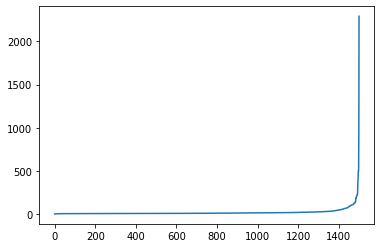

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np


df_db = df_market.copy()
nn=NearestNeighbors(n_neighbors=4)
nn.fit(df_market)
distance,index=nn.kneighbors(df_market)
plt.plot(np.sort(distance[:,3]))
plt.show()



In [7]:
epsilon = 75
mins = 5

dbs = DBSCAN(eps = epsilon, min_samples = mins)
df_db['Cluster'] = dbs.fit_predict(df_market)
df_db.Cluster.value_counts()


 0    1444
-1      51
 1       5
Name: Cluster, dtype: int64

In [9]:

import plotly as ply
import plotly.graph_objs as go

def tracer(db, n, name):

    return go.Scatter3d(
        x = db[db['Cluster']==n]['V1'],
        y = db[db['Cluster']==n]['Time'],
        z = db[db['Cluster']==n]['Amount'],
        mode = 'markers',
        name = name,
        marker = dict(
            size = 4
        )
     )

trace0 = tracer(df_db, 0, 'Cluster 0')
trace1 = tracer(df_db, 1, 'Cluster 1')
trace2 = tracer(df_db, 2, 'Cluster 2')
trace3 = tracer(df_db, 3, 'Cluster 3')
trace4 = tracer(df_db, 4, 'Cluster 4')

data = [trace0, trace1, trace2, trace3, trace4]

layout = go.Layout(

    scene = dict(
            xaxis = dict(title = 'V1'),
            yaxis = dict(title = 'Time'),
            zaxis = dict(title = 'Amount')
        )
)

fig = go.Figure(data=data, layout=layout)
ply.offline.iplot(fig)